# **Muscular Fatigue Data Analysis - Advanced Electronics - PRA3012**

## Imports of libraries and data

In [0]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from scipy import signal
%matplotlib inline

plt.style.use('dark_background')

***
## Intro: Using the Short Time Fourier Transforms (STFT) and Fast Fourier Transform (FFT)


Fast Fourier transform (FFT) is an algorithm for computing the discrete Fourier transform (DFT) and can only output a frequency spectrum without any information on the time: the DFT on a time series will give you the overall frequency components for the entire time series.

Short-time Fourier transform (STFT) is a method of taking a “window” that slides along the time series and performing the DFT on the time dependent segment

### How to create a spectrogram and use the Short Time Fourier Transforms (stft from scipy.signal)

Text(0.5, 0, 'Time [us]')

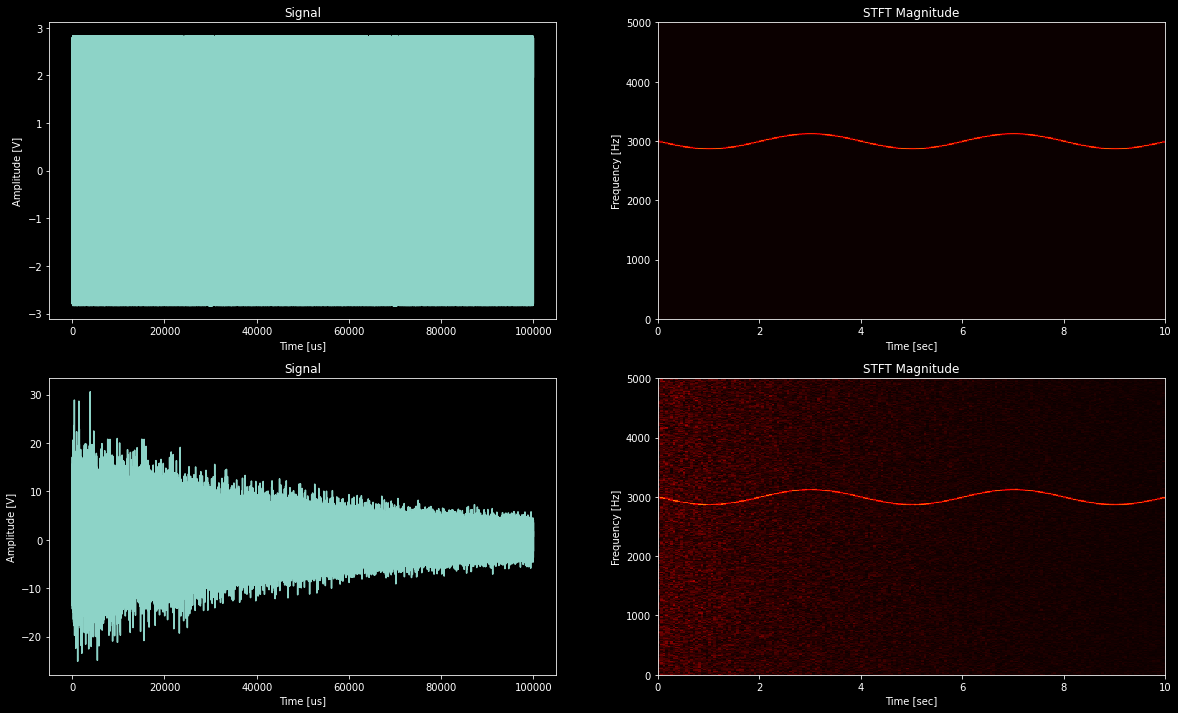

In [0]:
fig, a = plt.subplots(2,2,figsize=(20, 12))

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time) #This makes the frequency vary periodically (as seen on the graphs below)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),size=time.shape)
noise *= np.exp(-time/5)
x_clean = carrier
x_noise = carrier + noise

f1, t1, Zxx1 = signal.stft(x_clean, fs, nperseg=1000)
a[0][1].pcolormesh(t1, f1, np.abs(Zxx1), vmin=0, vmax=amp,cmap="hot")
a[0][1].set_title('STFT Magnitude')
a[0][1].set_ylabel('Frequency [Hz]')
a[0][1].set_xlabel('Time [sec]')

f2, t2, Zxx2 = signal.stft(x_noise, fs, nperseg=1000)
a[1][1].pcolormesh(t2, f2, np.abs(Zxx2), vmin=0, vmax=amp,cmap="hot")
a[1][1].set_title('STFT Magnitude')
a[1][1].set_ylabel('Frequency [Hz]')
a[1][1].set_xlabel('Time [sec]')

a[0][0].plot(x_clean)
a[0][0].set_title('Signal')
a[0][0].set_ylabel('Amplitude [V]')
a[0][0].set_xlabel('Time [us]')

a[1][0].plot(x_noise)
a[1][0].set_title('Signal')
a[1][0].set_ylabel('Amplitude [V]')
a[1][0].set_xlabel('Time [us]')

Above we can see how the artificial signal can be broken down into it's frequencies. On the left is the signal, and on the right we can see the spectrogram showing the frequencies present. This specific spectrogram shows that the frequency of the signal oscillates around 3000 Hz.The top graphs are the signal without noise and the bottom ones have noise (see the code).
From the outputs of the stft (the frequency spectrum) we can also rebuild the whole signal using a inverse short time fourier transform (istft), as we can see in the code below.

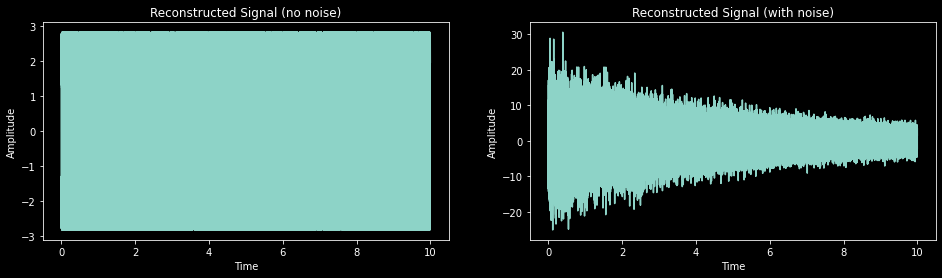

In [0]:
fig, (a0,a1) = plt.subplots(1,2,figsize=(16, 4))
t1,x1 = signal.istft(Zxx1,fs)
t2,x2 = signal.istft(Zxx2,fs)
a0.set_title("Reconstructed Signal (no noise)")
a1.set_title("Reconstructed Signal (with noise)")
a0.set_ylabel("Amplitude")
a1.set_ylabel("Amplitude")
a0.set_xlabel("Time")
a1.set_xlabel("Time")
a0.plot(t1,x1)
a1.plot(t2,x2)

### Frequency Spectra from Normal Fourier Transform and Signal Filtering (with scipy.fft)

In the first set of graphs below, we create two sine waves with different frequencies and take their FFT. This show a single frequency peak, that matches with the sine waves frequency.

The last graphs are a combination of the two sine waves, and again the FFt is taken and this time it shows that the frequency spectrum of this signal is made of two peaks, 50 and 80 Hz

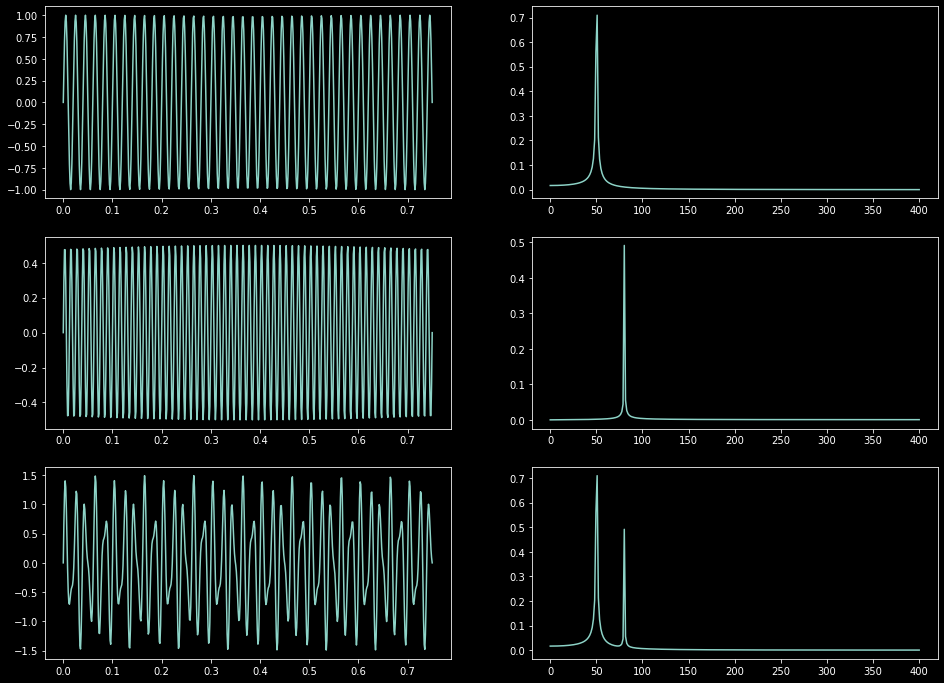

In [0]:
from scipy.fft import fft,ifft, rfft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y1 = np.sin(50.0 * 2.0*np.pi*x) 
y2 = 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = y1 + y2

fig, a = plt.subplots(3,2,figsize=(16, 12))
a[0][0].plot(x,y1)
a[0][1].plot(np.linspace(0.0, 1.0/(2.0*T), N//2),2.0/N * np.abs(fft(y1)[0:N//2]))
a[1][0].plot(x,y2)
a[1][1].plot(np.linspace(0.0, 1.0/(2.0*T), N//2),2.0/N * np.abs(fft(y2)[0:N//2]))
a[2][0].plot(x,y)
a[2][1].plot(np.linspace(0.0, 1.0/(2.0*T), N//2),2.0/N * np.abs(fft(y)[0:N//2]))

Now we will try to filter one of the peaks. The first graphs just shows the same as above, the signal and it's frequency domain, but the signal has been reconstructed using the inverse fourier transform 

For the first filtering we just change the output from the FFT so that after a certain number, all y are just 0. This creates this sharp filtering that can be seen as a drop. When reconstructing the filtered signal, we see that it is not nearly as nice as we hoped. We would have liked a signal like the first graph above. Here we have a smaller amplitude that is not constant. So not very good...

The second try is actually using one of the frequency domains we got above and deletes it from the data. This gives a perfect filtering of 80Hz, as can be seen in the reconstruction.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


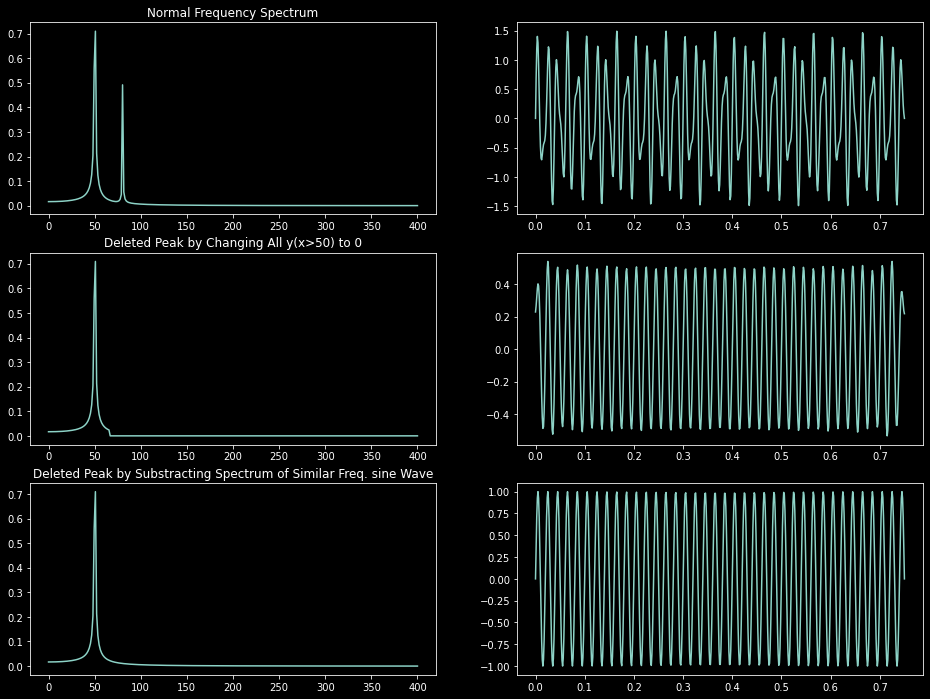

In [0]:
fig, a = plt.subplots(3,2,figsize=(16,12))

yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
a[0][0].set_title("Normal Frequency Spectrum")
a[0][0].plot(xf, 2.0/N * np.abs(yf[0:N//2]))

yff = ifft(yf)
a[0][1].plot(x,yff)

yf_cut1 = yf.copy()
yf_cut1[50:] = 0
a[1][0].set_title("Deleted Peak by Changing All y(x>50) to 0")
a[1][0].plot(xf, 2.0/N * np.abs(yf_cut1[0:N//2]))

y_cut1 = ifft(yf_cut1)
a[1][1].plot(x, y_cut1)

unwanted_freq_peak = fft(y2)
yf_cut2 = yf.copy()
yf_cut2 -= unwanted_freq_peak
a[2][0].set_title("Deleted Peak by Substracting Spectrum of Similar Freq. sine Wave")
a[2][0].plot(xf, 2.0/N * np.abs(yf_cut2[0:N//2]))

y_cut2 = ifft(yf_cut2)
a[2][1].plot(x, y_cut2)

***
## **Data Analysis for the Group of Last Year**

### Dataset Creation

In [0]:
import os
data_pre = []
names = []

for file in os.listdir("ParsedData/"):
  if ("toby" not in file) and (".csv" in file):
    names.append((file.split('.')[0]).split('_')[0])
    data_pre.append(pd.read_csv("ParsedData/"+file))

T = []
V = []
for sample in data_pre:
    T.append(sample["Time (s)"])
    V.append(sample["Kanaal 1"])

fs = 1000

four_pre = []
for i in range(len(data_pre)):
    four_pre.append(signal.stft(V[i], fs))

### Graphing Function

In [0]:
def GraphData_last(T,V,four_pre,numb):
  print(names[numb])
  fig, (a0,a1) = plt.subplots(1,2,figsize=(16, 4))
  a0.plot(T[numb],V[numb])
  cf = a1.pcolormesh(four_pre[numb][1],four_pre[numb][0],np.abs(four_pre[numb][2]),cmap='hot')
  a0.set_xlabel("Time (ms)")
  a1.set_xlabel("Time (s)")
  a0.set_ylabel("Amplitude (mV)")
  a1.set_ylabel("Frequency (Hz)")
  fig.colorbar(cf, ax=a1)

### Graphs

jord


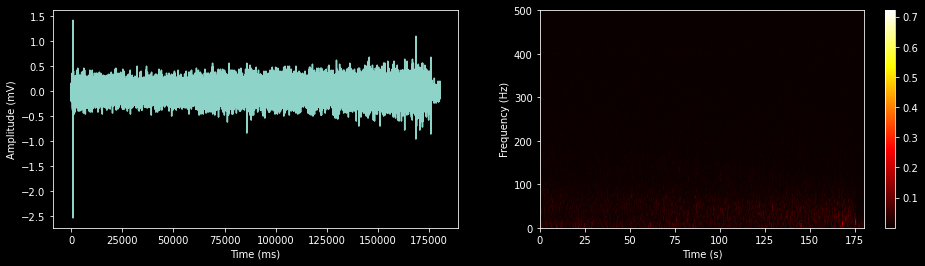

In [0]:
GraphData_last(T,V,four_pre,0)

Irma


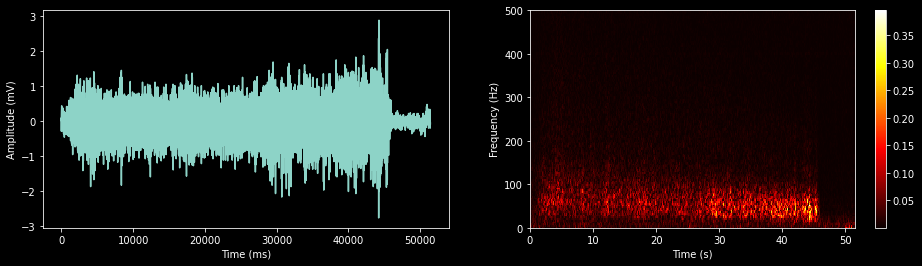

In [0]:
GraphData_last(T,V,four_pre,1)

adrianne


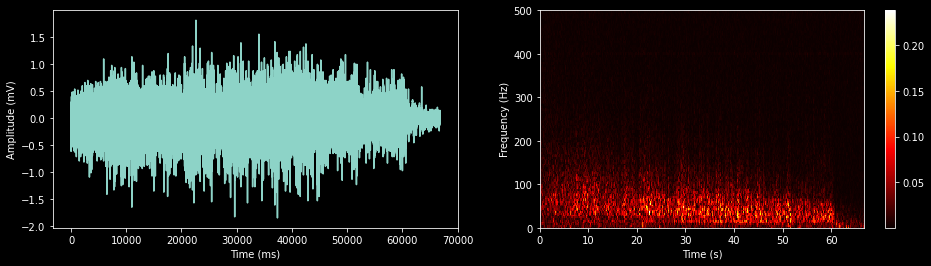

In [0]:
GraphData_last(T,V,four_pre,2)

Shania


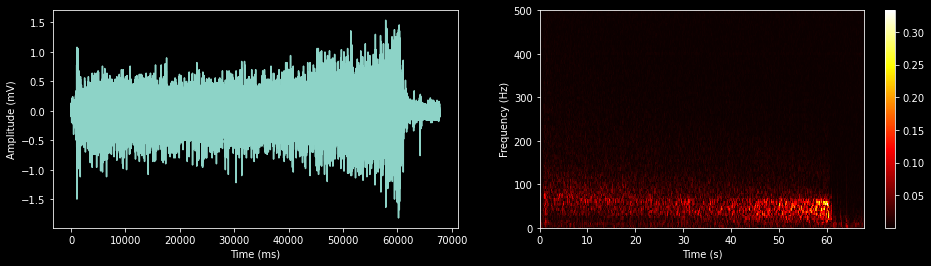

In [0]:
GraphData_last(T,V,four_pre,3)

Marijn


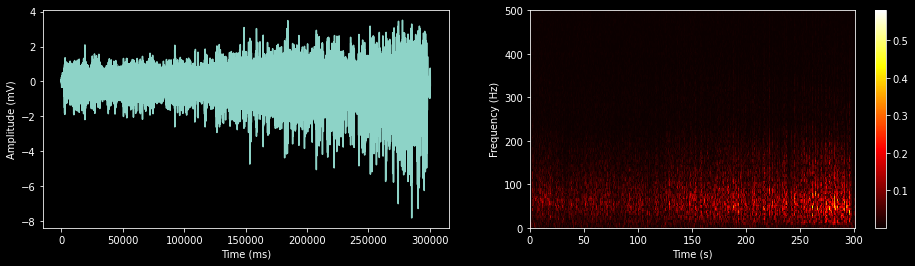

In [0]:
GraphData_last(T,V,four_pre,4)

timour


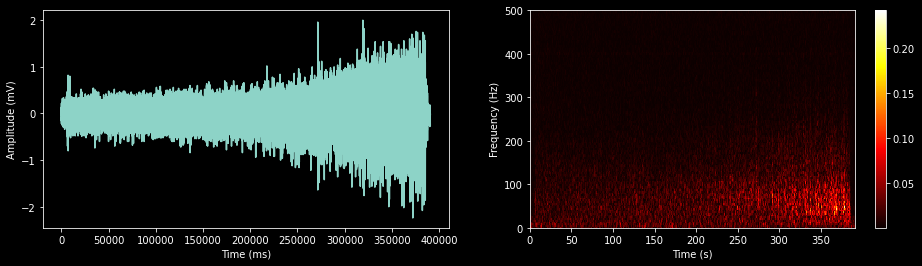

In [0]:
GraphData_last(T,V,four_pre,5)

wladimir


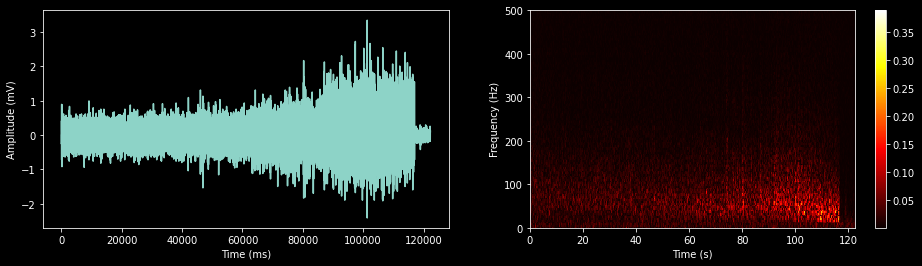

In [0]:
GraphData_last(T,V,four_pre,6)

Zeynep


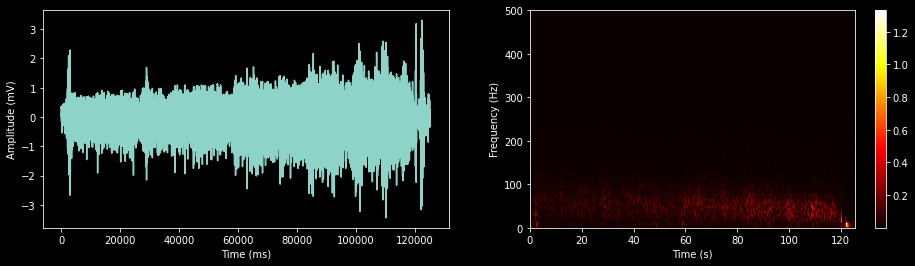

In [0]:
GraphData_last(T,V,four_pre,7)

***
## **Data Analysis for our Group**

### Dataset Creation

In [0]:
data = []
for i in range(14):
    if i+1 < 10:
        data.append(pd.read_csv("ParsedData/toby_00{}_OUT.csv".format(i+1)))
    elif i+1 == 12:
        pass
    else:
        data.append(pd.read_csv("ParsedData/toby_0{}_OUT.csv".format(i+1)))

t = []
v1 = []
v2 = []
for sample in data:
    t.append(sample["Time (s)"])
    v1.append(sample["Kanaal 1"])
    v2.append(sample["Kanaal 5"])

fs1 = 5000

four1 = []
four2 = []
for i in range(13):
    four1.append(signal.stft(v1[i], fs1))
    four2.append(signal.stft(v2[i], fs1))

### Graphing Function

In [0]:
#The change variable is if you need to cut the data shorter. It has to be an array, change[0] can be 0 (need to change first ftft),1 (2nd) or 2 (both)
#and then change[1] is the value from zero to ... . There can be a third value change[2] if you want to change both.
def graphDATA(four1,four2,t,v1,v2,numb,change=False):
  fig, a = plt.subplots(2,2,figsize=(16, 8))
  if change == False:
    a[0][0].plot(t[numb],v1[numb])
    a[1][0].plot(t[numb],v2[numb])
    cf1 = a[0][1].pcolormesh(four1[numb][1],four1[numb][0],np.abs(four1[numb][2]),cmap='hot')
    cf2 = a[1][1].pcolormesh(four2[numb][1],four2[numb][0],np.abs(four2[numb][2]),cmap='hot')
  else:
    if change[0]==0:
      a[0][0].plot(t[numb][:change[1]],v1[numb][:change[1]])
      a[1][0].plot(t[numb],v2[numb])
      four1_Adj = signal.stft(v1[numb][:change[1]], fs1)
      cf1 = a[0][1].pcolormesh(four1_Adj[1],four1_Adj[0],np.abs(four1_Adj[2]),cmap='hot')
      cf2 = a[1][1].pcolormesh(four2[numb][1],four2[numb][0],np.abs(four2[numb][2]),cmap='hot')
    elif change[0]==1:
      a[0][0].plot(t[numb],v1[numb])
      a[1][0].plot(t[numb][:change[1]],v2[numb][:change[1]])
      four2_Adj = signal.stft(v1[numb][:change[1]], fs1)
      cf1 = a[0][1].pcolormesh(four1[numb][1],four1[numb][0],np.abs(four1[numb][2]),cmap='hot')
      cf2 = a[1][1].pcolormesh(four2_Adj[1],four2_Adj[0],np.abs(four2_Adj[2]),cmap='hot')
    elif change[0]==2:
      a[0][0].plot(t[numb][:change[1]],v1[numb][:change[1]])
      a[1][0].plot(t[numb][:change[2]],v2[numb][:change[2]])
      four1_Adj = signal.stft(v1[numb][:change[1]], fs1)
      four2_Adj = signal.stft(v1[numb][:change[2]], fs1)
      cf1 = a[0][1].pcolormesh(four1_Adj[1],four1_Adj[0],np.abs(four1_Adj[2]),cmap='hot')
      cf2 = a[1][1].pcolormesh(four2_Adj[1],four2_Adj[0],np.abs(four2_Adj[2]),cmap='hot')

  a[0][0].set_xlabel("Time (ms)")
  a[0][1].set_xlabel("Time (s)")
  a[0][0].set_ylabel("Amplitude (mV)")
  a[0][1].set_ylabel("Frequency (Hz)")
  a[1][0].set_xlabel("Time (ms)")
  a[1][1].set_xlabel("Time (s)")
  a[1][0].set_ylabel("Amplitude (mV)")
  a[1][1].set_ylabel("Frequency (Hz)")
  a[0][1].set_ylim(0,1000)
  a[1][1].set_ylim(0,1000)
  fig.colorbar(cf1, ax=a[0][1])
  fig.colorbar(cf2, ax=a[1][1])

### Graphs

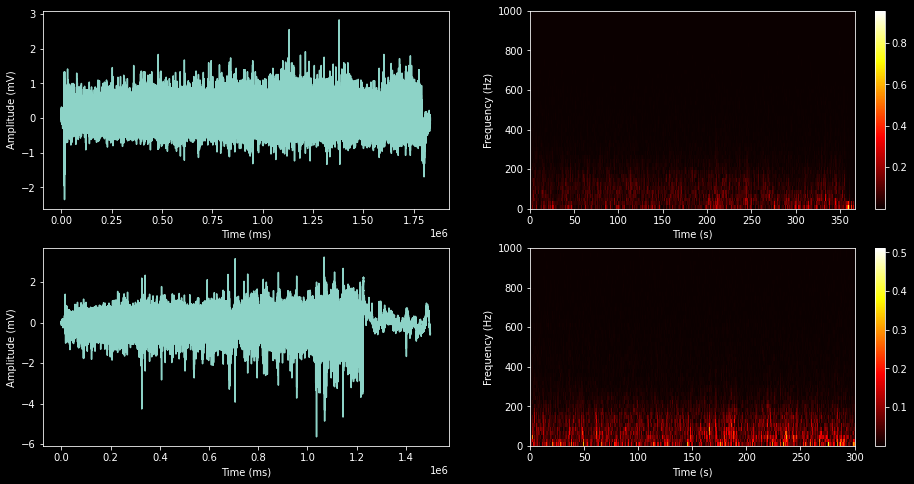

In [0]:
graphDATA(four1,four2,t,v1,v2,0,[1,1500000])

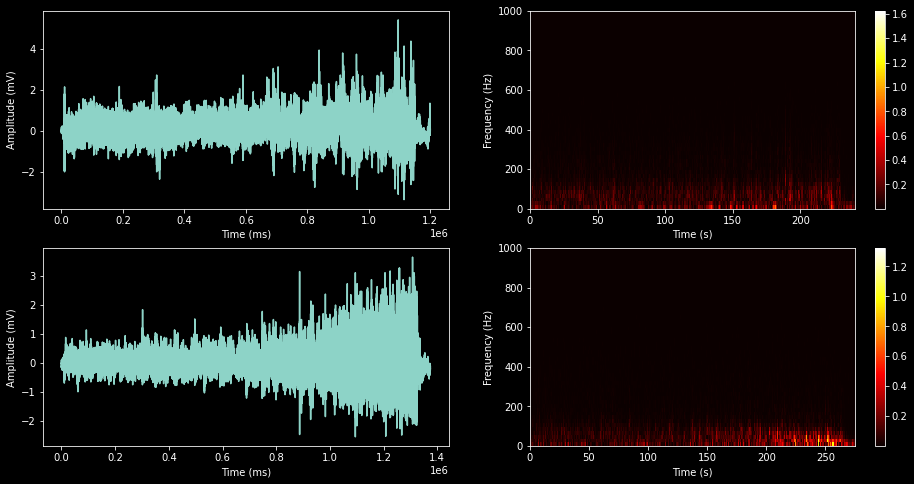

In [0]:
graphDATA(four1,four2,t,v1,v2,1,[0,1200000])

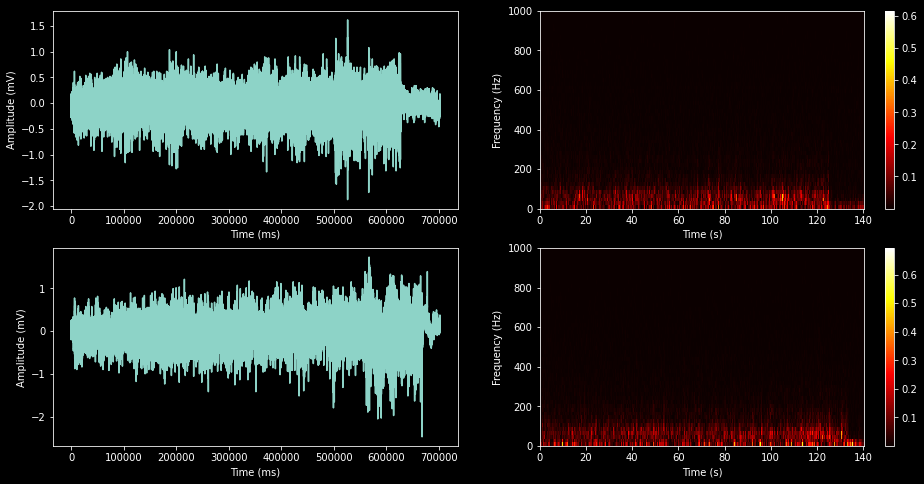

In [0]:
graphDATA(four1,four2,t,v1,v2,2)

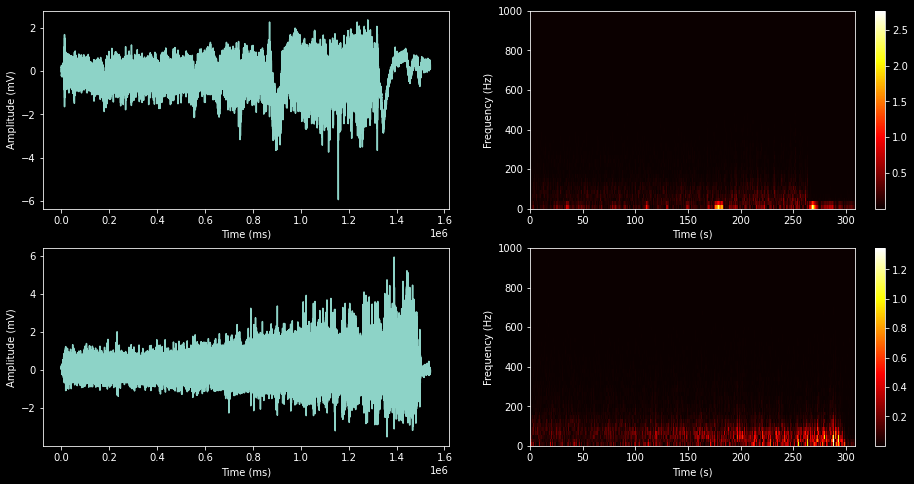

In [0]:
graphDATA(four1,four2,t,v1,v2,3)

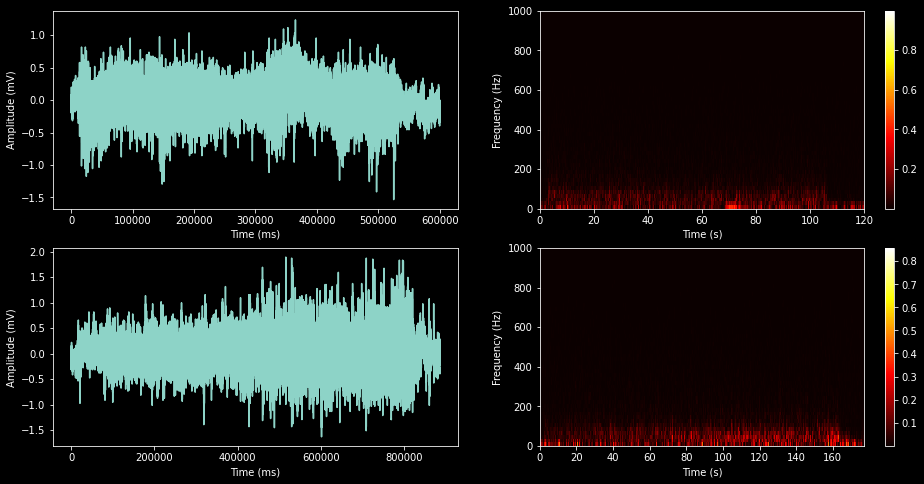

In [0]:
graphDATA(four1,four2,t,v1,v2,4,change=[0,600000])

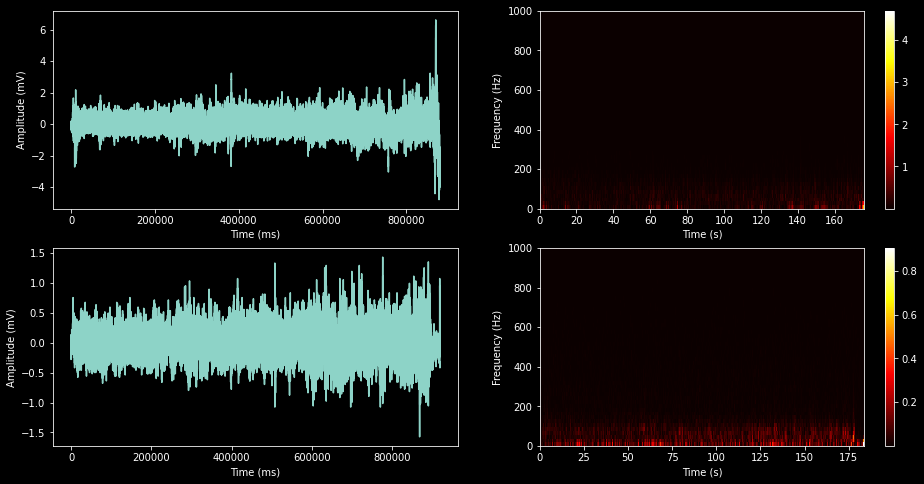

In [0]:
graphDATA(four1,four2,t,v1,v2,5,[0,880000])

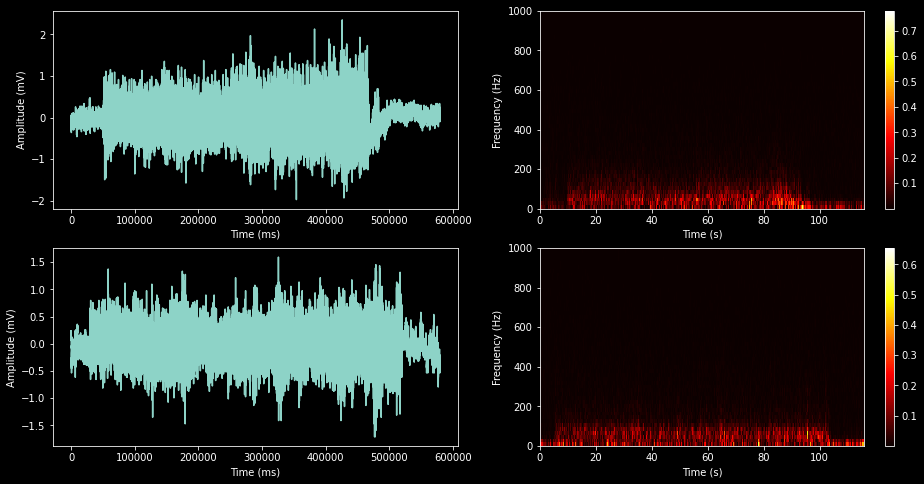

In [0]:
graphDATA(four1,four2,t,v1,v2,6)

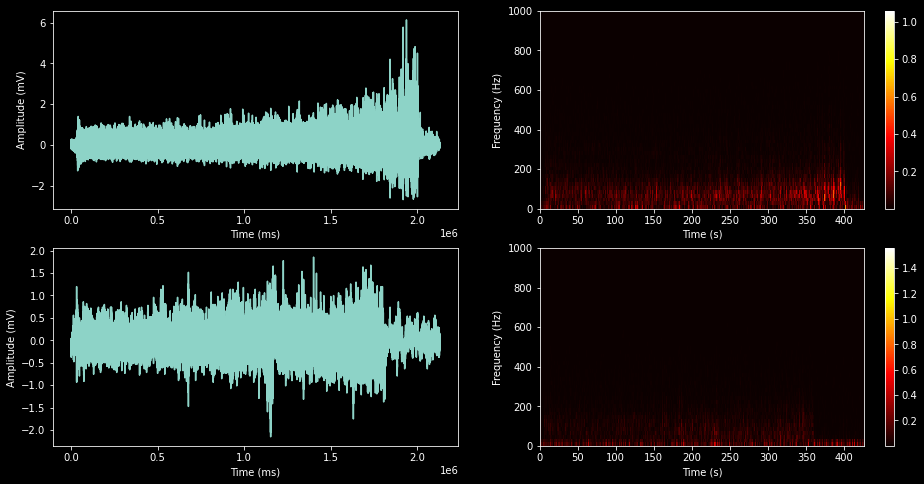

In [0]:
graphDATA(four1,four2,t,v1,v2,7)

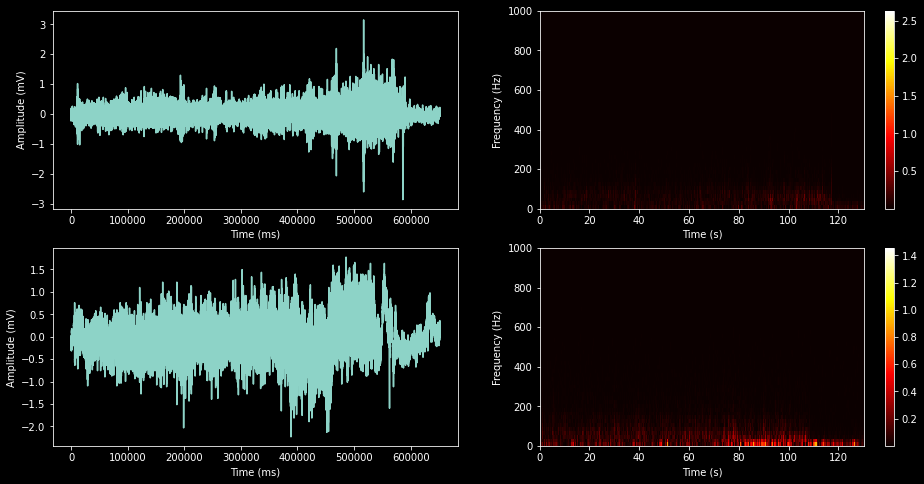

In [0]:
graphDATA(four1,four2,t,v1,v2,8)

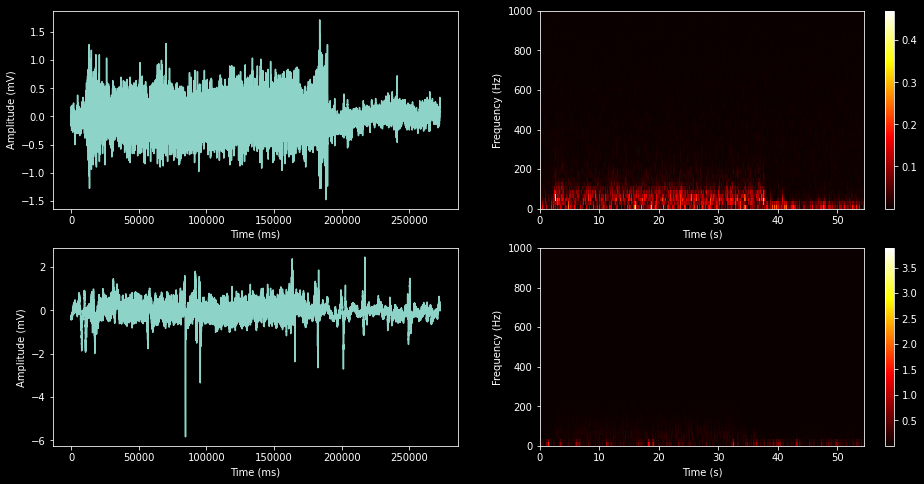

In [0]:
graphDATA(four1,four2,t,v1,v2,9)

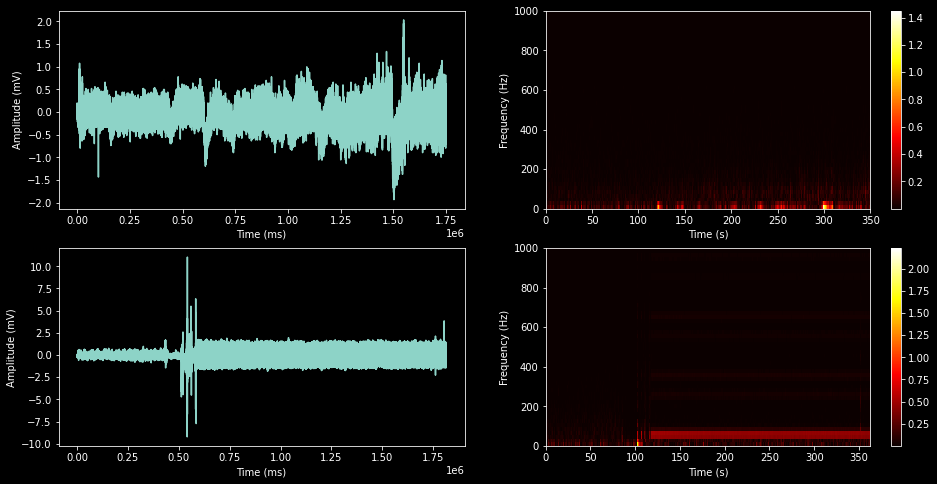

In [0]:
graphDATA(four1,four2,t,v1,v2,10,[0,1750000])

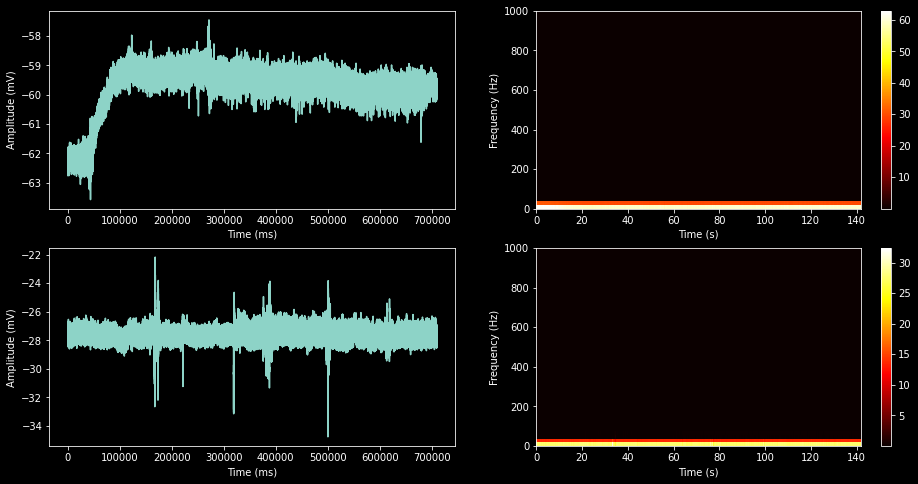

In [0]:
graphDATA(four1,four2,t,v1,v2,11)

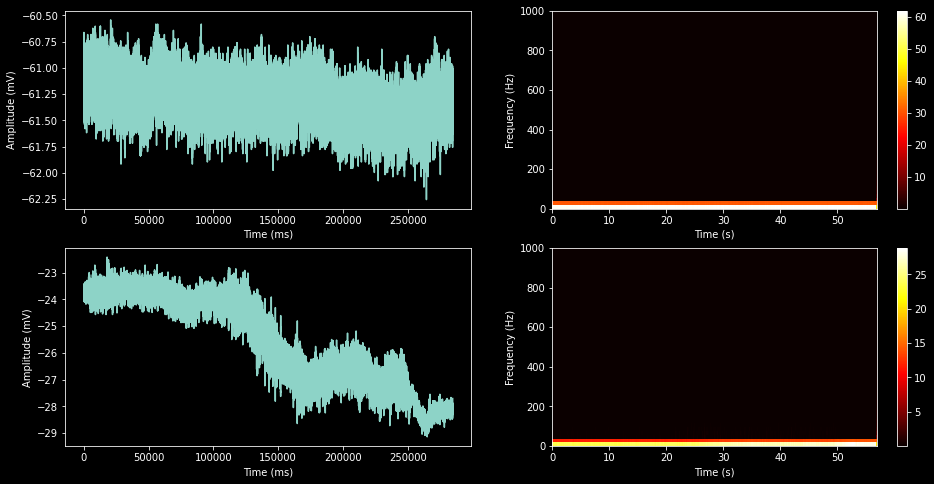

In [0]:
graphDATA(four1,four2,t,v1,v2,12)

Reconstruction of the last graph using inverse STFT (ISTFT)

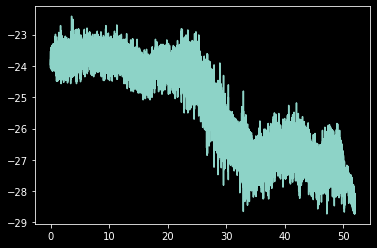

In [0]:
t,x = signal.istft(four2[12][2],fs1)
plt.plot(t[:260000],x[:260000])